In [2]:
from imports import *

In [3]:
def filter_df(df,stru,types):
    return df[(df.Region == stru) & (df.Type == types)]

In [4]:
bk.load.current_session_linux()
fr = pd.read_csv(bk.load.base+'/All-Rats/States/fr_states.csv')
n_spikes = pd.read_csv(bk.load.base+'/All-Rats/States/n_spikes.csv')
theta = pd.read_csv(bk.load.base+'/All-Rats/Frequency_Modulation/theta.csv')
df = pd.merge(fr,n_spikes)
df = pd.merge(df,theta,how='inner')

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713


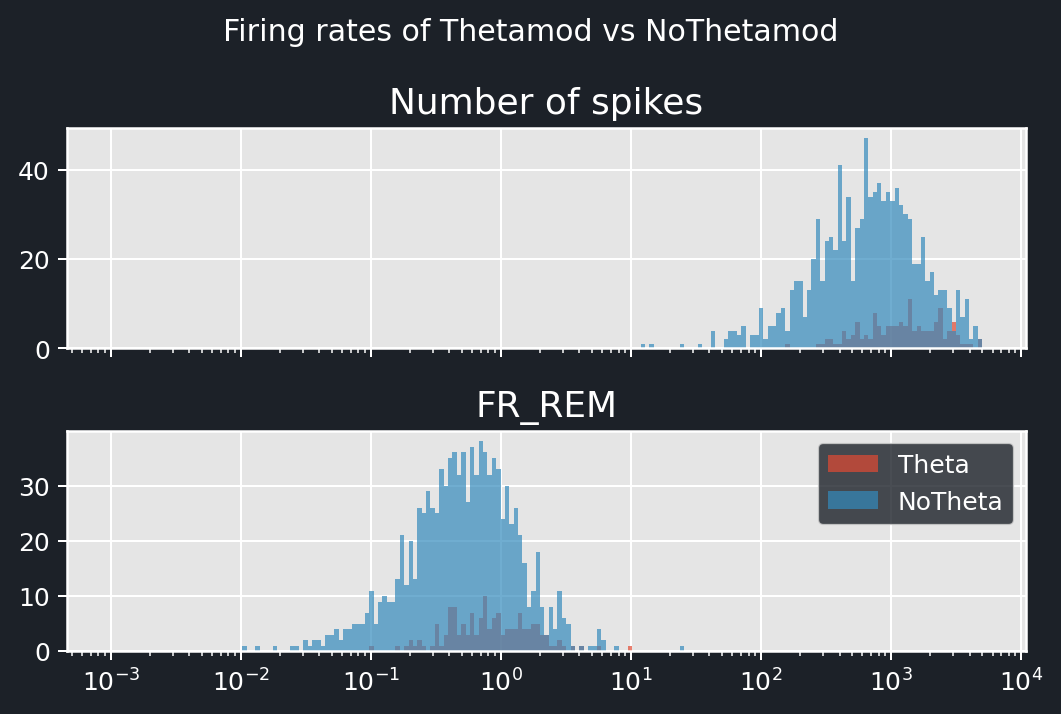

In [5]:
df_bla = filter_df(df,'BLA','Pyr')

bins = np.geomspace(0.001,5000,200)

fig, ax = plt.subplots(2,sharex=True,dpi = 180)
ax[0].hist(df_bla['n_spikes_REM'][df_bla.modulated],bins = bins,alpha = 0.7,density=False)
ax[0].hist(df_bla['n_spikes_REM'][~ df_bla.modulated],bins = bins,alpha = 0.7,density=False)
ax[0].set_title('Number of spikes')
ax[1].hist(df_bla['REM'][df_bla.modulated],bins = bins,alpha = 0.7,density=False)
ax[1].hist(df_bla['REM'][~ df_bla.modulated],bins = bins,alpha = 0.7,density=False)
ax[1].set_title('FR_REM')

plt.semilogx() 
plt.legend(['Theta','NoTheta'])
plt.suptitle('Firing rates of Thetamod vs NoThetamod')
plt.tight_layout()